# Facial Recognition

Facial recognition is a technology that uses artificial intelligence algorithms to identify and verify the identity of a person by analyzing their facial features. It works by capturing an image of a person's face and then comparing it to a database of images to find a match. This technology has a wide range of applications, including security, law enforcement, and personal convenience, such as unlocking smartphones. However, it also raises concerns about privacy, as it can be used to track people without their consent and potentially infringe on civil liberties. As a result, the use of facial recognition is a subject of ongoing debate and regulation in many countries around the world.

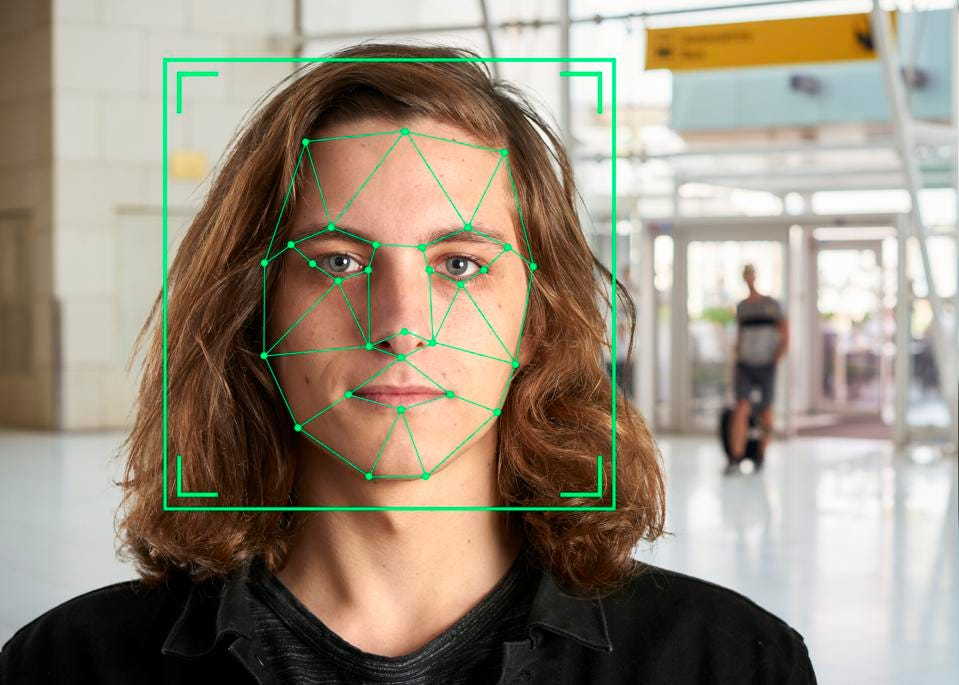

### Literature Review

Facial recognition technology has been the subject of intense research and development in recent years, with applications ranging from security and surveillance to marketing and social media. The literature on facial recognition covers a wide range of topics, including the technical aspects of image processing and machine learning algorithms, the ethical and privacy implications of facial recognition systems, and the social and cultural impacts of this technology. Researchers have explored the accuracy and reliability of facial recognition systems under different conditions, such as changes in lighting and facial expressions, and have investigated the biases and errors that can arise in these systems, particularly with respect to race and gender. Moreover, scholars have examined the legal and regulatory frameworks governing the use of facial recognition in various contexts, and have explored the implications of this technology for civil liberties, human rights, and democratic governance. Overall, the literature on facial recognition reflects a growing awareness of the potential benefits and risks of this technology, and highlights the need for further research, dialogue, and policy development to ensure that its use is guided by ethical and social considerations.

Face Recognition Dataset, a database of face photographs designed for the creation of face detection and recognition models. This dataset has been derived from the Labeled Faces in the Wild Dataset.
This dataset is a collection of JPEG pictures of famous people collected on the internet. All details are available on the official website:

http://vis-www.cs.umass.edu/lfw/

### The Dataset
- Each picture is centered on a single face, and every image is encoded in RGB. The original images are of the size 250 x 250.
- The dataset contains 1680 directories, each representing a celebrity.
- Each directory has 2-50 images for the celebrity.

### Extracted Faces

- Faces extracted from the original image using Haar-Cascade Classifier (cv2)
- encoded in RGB and size of image is 128, 128

# Dataset overview

While unzipping the dataset. There are two folders Face Data and Extracted Faces. We shall be using Extracted Faces because it would be easy for classifier to work on a zoomed in face picture

## The dataset is popularly known as LFW dataset and it is also pre-avaliable inside the sklearn library

## Visualizing the Frequency of the picture

Data imbalance is a very big problem in machine learning. So Frequency Visualization of the number of pictures in each class is very important

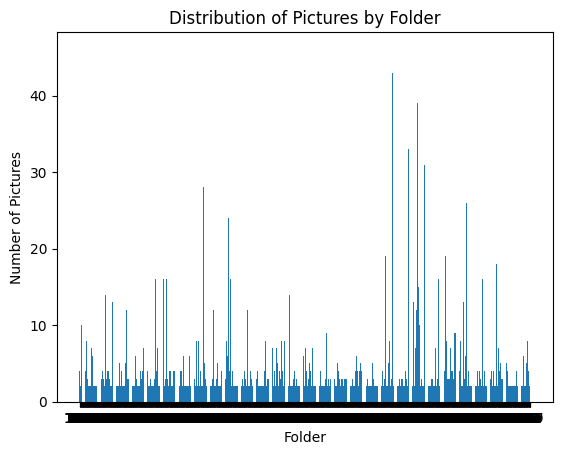

In [1]:
import os
import matplotlib.pyplot as plt

folder_path = "./Extracted Faces/Extracted Faces"

# Get the subfolders and their counts
subfolders = os.listdir(folder_path)
counts = [len(os.listdir(os.path.join(folder_path, subfolder))) for subfolder in subfolders]

# Create a bar plot of the counts
plt.bar(subfolders, counts)
plt.title("Distribution of Pictures by Folder")
plt.xlabel("Folder")
plt.ylabel("Number of Pictures")
plt.show()


When working with a dataset with a large number of classes such as the facial recognition dataset with 1678 classes, it is challenging to train a classifier using traditional machine learning or deep learning methods due to the high computational cost and the limited amount of data available per class.

In this scenario, few-shot learning and siamese models are two promising approaches that can help overcome these challenges and improve the performance of the classifier.

Few-shot learning is a type of machine learning that aims to train models that can recognize new classes with very few labeled examples. It achieves this by leveraging the knowledge learned from previously seen classes to adapt to new classes quickly. One popular few-shot learning approach is the meta-learning algorithm, which learns to learn by training models on multiple related tasks and using the learned knowledge to generalize to new tasks with few examples.

On the other hand, siamese models are deep neural networks that learn a similarity function between pairs of inputs. They consist of two identical subnetworks that share weights and are trained to minimize the distance between the representations of similar pairs and maximize the distance between dissimilar pairs. Siamese models are particularly useful for face recognition tasks as they can compare the similarity between two faces even if they have different orientations, lighting conditions, or facial expressions.

Therefore, both few-shot learning and siamese models can be effective for facial recognition tasks with a large number of classes. The choice between the two methods depends on the specific requirements and constraints of the task, such as the amount of labeled data available, the computational resources available, and the desired level of accuracy and generalization.

### Siamese Network with Pretrained Models

At this point we shall use different pretrained models to develop Siamese Network and the model model that performs best would be suitable for this task


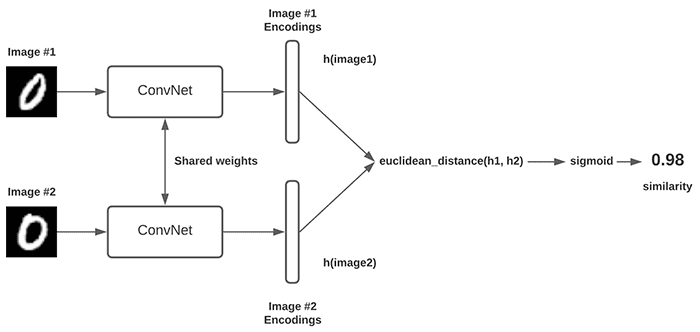

In [2]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [3]:
# Check GPU avaliability
import tensorflow
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17377169319470612729
xla_global_id: -1
]


In [4]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.datasets import fetch_lfw_pairs
import os
import keras.backend as K
from keras.models import Model, Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Input, Subtract, Lambda,Dropout,Concatenate
from keras.optimizers import Adam, SGD , RMSprop
from keras.regularizers import l2
import keras.backend as K
from keras import activations
from keras import applications
import tensorflow as tf
#from keras.legacy import interfaces
import keras.backend as K
from keras.optimizers import Optimizer
import numpy as np
from keras.callbacks import EarlyStopping , ModelCheckpoint
from keras.initializers import RandomNormal
from keras.models import model_from_json

In [5]:
image_slice=(slice(70, 195), slice(65, 190))
from sklearn.datasets import fetch_lfw_pairs
lfw_pairs_train = fetch_lfw_pairs(subset='train',funneled=False,resize=1,slice_=image_slice,color=True)
lfw_pairs_train.pairs=lfw_pairs_train.pairs/255

In [6]:
list(lfw_pairs_train.target_names)

['Different persons', 'Same person']

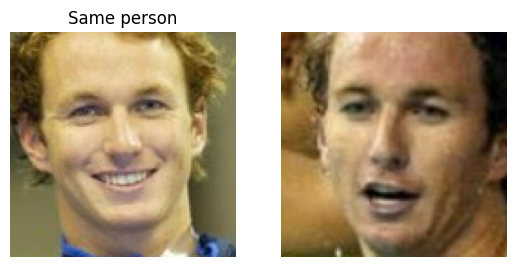

In [7]:
ind = 1
img1, img2 = lfw_pairs_train.pairs[ind]
img1 = img1 
img2 = img2 

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title(lfw_pairs_train.target_names[lfw_pairs_train.target[ind]])
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)

plt.axis('off')

plt.show()

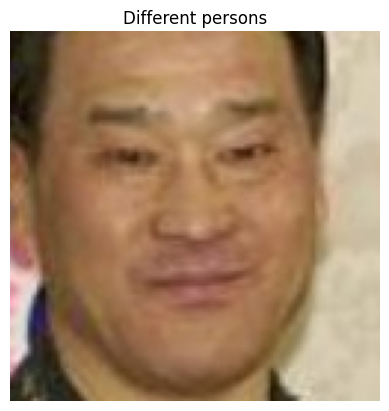

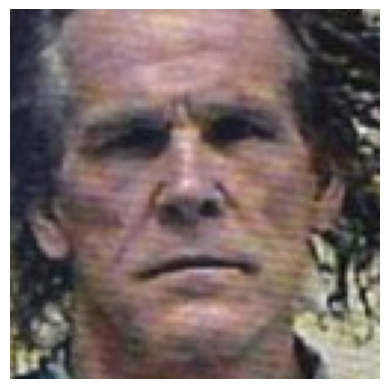

In [8]:
ind=2000
img1,img2=lfw_pairs_train.pairs[ind]
img1 = img1
img2 = img2
plt.title(lfw_pairs_train.target_names[lfw_pairs_train.target[ind]])
plt.imshow(img1,cmap='gray')
plt.axis('off')
plt.show()
plt.imshow(img2,cmap='gray')
plt.axis('off')
plt.show()

In [9]:
def save_model(model,name):
    # Save the weights
    model.save_weights('models/'+name+'_'+'model_weights.h5')

    # Save the model architecture
    with open('models/'+name+'_'+'model_architecture.json', 'w') as f:
        f.write(model.to_json())
        
def load_model(name):
    # Model reconstruction from JSON file
    with open('models/'+name+'_'+'model_architecture.json', 'r') as f:
        model = model_from_json(f.read())

    # Load weights into the new model
    model.load_weights('models/'+name+'_'+'model_weights.h5')
    return model


def euclidean_distance(vects):
    x, y = vects
    return K.sqrt(K.maximum(K.sum(K.square(x - y), axis=1, keepdims=True), K.epsilon()))


def eucl_dist_output_shape(shapes):
    shape1, shape2 = shapes
    return (shape1[0], 1)


def contrastive_loss(y_true, y_pred):
    '''Contrastive loss from Hadsell-et-al.'06
    http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
    '''
    margin = 1
    return  K.mean((1 - y_true) * K.square(y_pred) + y_true * K.square(K.maximum(margin - y_pred, 0)))




### Defining the input shape to the Neural Network

In [22]:
shape=lfw_pairs_train.pairs.shape[2]
input_shape= (shape, shape, 3)

## Defining a Siamese Model with base model as VGG-16

In [23]:
from tensorflow.keras.applications.vgg16 import VGG16

# Load pre-trained VGG-16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze all layers in the VGG-16 model except the last 4 convolutional layers
for layer in vgg16.layers[:-4]:
    layer.trainable = False

# Define the Siamese network
input_image_1 = Input(input_shape)
input_image_2 = Input(input_shape)

# Shared encoder
encoder = Sequential()
encoder.add(vgg16)
encoder.add(Flatten())
encoder.add(Dense(units=4096, activation='sigmoid', name='Dense1'))

encoded_image_1 = encoder(input_image_1)
encoded_image_2 = encoder(input_image_2)

# L1 distance layer between the two encoded outputs
# One could use Subtract from Keras, but we want the absolute value
distance = Lambda(euclidean_distance, output_shape=eucl_dist_output_shape)([encoded_image_1, encoded_image_2])

siamese_model = Model([input_image_1, input_image_2], distance)

rms = RMSprop()
siamese_model.compile(loss=contrastive_loss, optimizer=rms, metrics=['binary_accuracy'])





In [26]:
siamese_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 125, 125, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_9 (InputLayer)           [(None, 125, 125, 3  0           []                               
                                )]                                                                
                                                                                                  
 sequential_2 (Sequential)      (None, 4096)         33593152    ['input_8[0][0]',                
                                                                  'input_9[0][0]']          

## Defining Functions for train validation splits

In [24]:
def train_validation_pairs(lfw_pairs_train, valid=0.2):
    """
    :param lfw_pairs_train:
    :param valid:
    :return:
    """
    ln = len(lfw_pairs_train.target)

    indices_same = np.random.choice(np.argwhere(lfw_pairs_train.target == 1).flatten(), int((1-valid) * ln / 2))
    indices_different = np.random.choice(np.argwhere(lfw_pairs_train.target == 0).flatten(),
                                         int((1 - valid) * ln / 2))
    indices = np.concatenate((indices_same, indices_different), axis=0)
    x_train = lfw_pairs_train.pairs[indices]
    x_train = [np.expand_dims(x_train[:, 0], axis=3), np.expand_dims(x_train[:, 1], axis=3)]
    y_train = lfw_pairs_train.target[indices]

    not_train_indices = np.arange(ln)[~np.isin(np.arange(ln), indices)]
    indices_same_valid = np.random.choice(not_train_indices[np.where(not_train_indices < int(ln / 2))],
                                          int(valid  * ln / 2))
    indices_different_valid = np.random.choice(not_train_indices[np.where(not_train_indices >= int(ln / 2))],
                                               int(valid  * ln / 2))
    indices_valid = np.concatenate((indices_same_valid, indices_different_valid), axis=0)

    x_valid = lfw_pairs_train.pairs[indices_valid]
    x_valid = [np.expand_dims(x_valid[:, 0], axis=3), np.expand_dims(x_valid[:, 1], axis=3)]
    y_valid = lfw_pairs_train.target[indices_valid]

    return x_train, y_train, x_valid, y_valid


def persons_same_different_split(x_train, y_train, percent_same=0.5,percent_diff=0.5):
    """
    :param lfw_pairs_train:
    :param percent_same:
    :return:
    """
    ln = len(y_train)

    indices_same = np.random.choice(np.argwhere(y_train == 1).flatten(), int(percent_same * ln / 2))
    indices_different = np.random.choice(np.argwhere(y_train == 0).flatten(),
                                         int(percent_diff * ln / 2))
    indices = np.concatenate((indices_same, indices_different), axis=0)
    x_train = [x_train[0][indices],x_train[1][indices]]
    y_train = y_train[indices]
    return x_train, y_train

## Training the Model

In [ ]:
best_model='models/best_model.h5'
early_stopping_monitor = EarlyStopping(patience=3)
checkpoint = ModelCheckpoint(filepath=best_model, monitor='val_loss', save_best_only=True)
batch_size = 2
epochs=10
iteration=1
percents_same=np.linspace(0.5,1,iteration)
percents_diff=np.linspace(0.2,1,iteration)


x_train, y_train, x_valid, y_valid=train_validation_pairs(lfw_pairs_train, valid=0.1)



for i in range(iteration):
    print(i)
    percent_same=percents_same[i]
    percent_diff=percents_diff[i]
    x_train_percent,y_train_percent = persons_same_different_split(x_train, y_train, percent_same=1,percent_diff=1) 
    x_train_percent = np.asarray(np.swapaxes(x_train_percent,4,5).squeeze()).tolist()
    
    history=siamese_model.fit(x=x_train_percent,y=1-y_train_percent,validation_data=(x_valid,1-y_valid) ,epochs=epochs, batch_size=batch_size, verbose=True, callbacks=[early_stopping_monitor,checkpoint])
    hist.append(history)
    siamese_model.load_weights(best_model)

0
